# Importing all the necessary dependencies

In [1]:
import pandas as pd 
import librosa
import numpy as np 
import os 
from glob import glob 
import matplotlib.pyplot as plt
import IPython.display as ipd
import random
from glob import glob
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout ,Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import librosa.display

# Exploring all the languages that are in the dataset

In [2]:
base_dir ='/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/'
languages = os.listdir(base_dir)


for i in languages:
    print(i)

Punjabi
Tamil
Hindi
Bengali
Telugu
Kannada
Gujarati
Urdu
Marathi
Malayalam


# A Voice sample from each language

In [3]:
for language in languages:
    language_dir = os.path.join(base_dir, language)
    audio_files = glob(os.path.join(language_dir, '*.mp3'))
    random_audio_file = random.choice(audio_files)
    print(language)
    ipd.display(ipd.Audio(random_audio_file))

Punjabi


Tamil


Hindi


Bengali


Telugu


Kannada


Gujarati


Urdu


Marathi


Malayalam


## After seeing sample from each class the audio files in Punjabi folder is not correct for the class 

In [4]:
# Here is a function which will extract the features from the audio files known as MFCC
# Here we ware excluding the punjabi class bcs it is containing wrong data

def MFCC_feature_extract(File_name):
    MFCC_features = []
    Class = []

    for language in File_name:
        language_dir = os.path.join(base_dir, language)
        audio_files = glob(os.path.join(language_dir, '*.mp3'))
        if language != 'Punjabi':
            #Here I am taking 5000 samples from each class
            for audio_file in audio_files[:5000]:
                try:
                    audio, sample_rate = librosa.load(audio_file)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    MFCC_features.append(mfccs_mean)
                    Class.append(language)
                except Exception as e:
                    print(f"Error processing {audio_file}: {e}")

    df = pd.DataFrame({'MFCC_Features': MFCC_features, 'Class': Class})
    return df


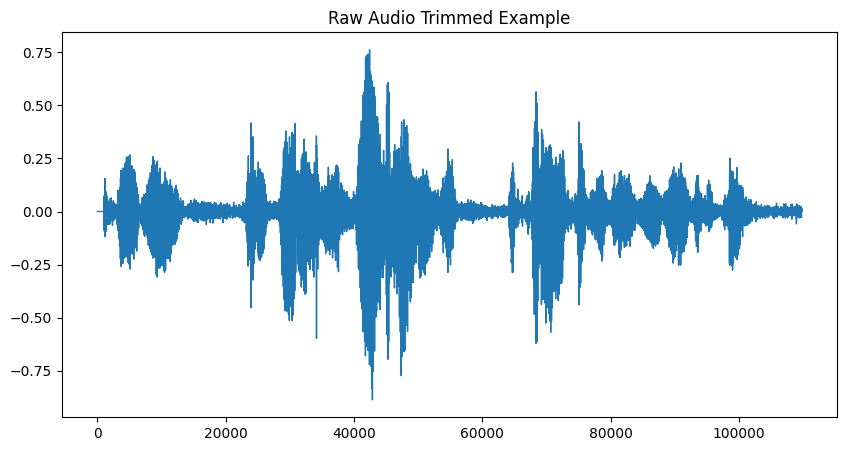

In [5]:


sample='/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/1.mp3'

y,z=librosa.load(sample)

pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example')
plt.show()

In [6]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [7]:

sample='/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/1.mp3'

y,z=librosa.load(sample)
S = librosa.feature.melspectrogram(y=y,sr=z,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


In [8]:
S_db_mel.shape

(256, 215)

# Raw plot of Audio Files

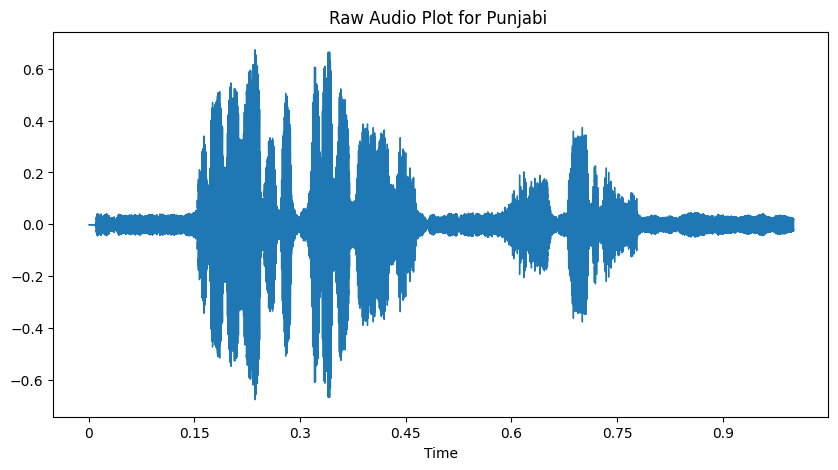

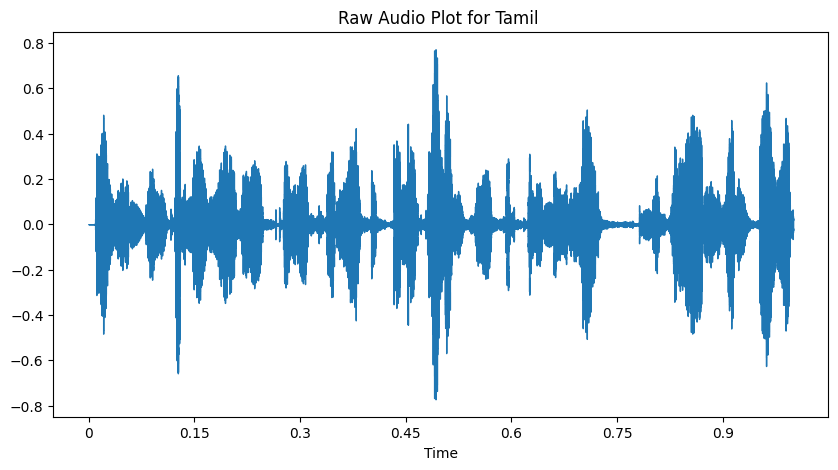

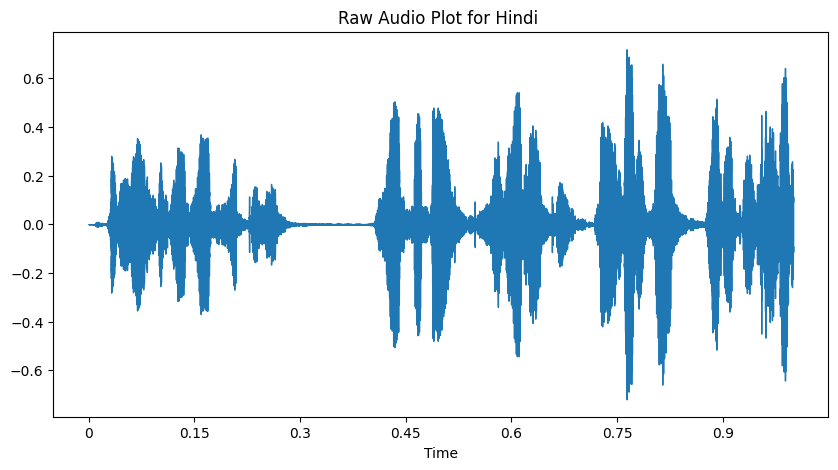

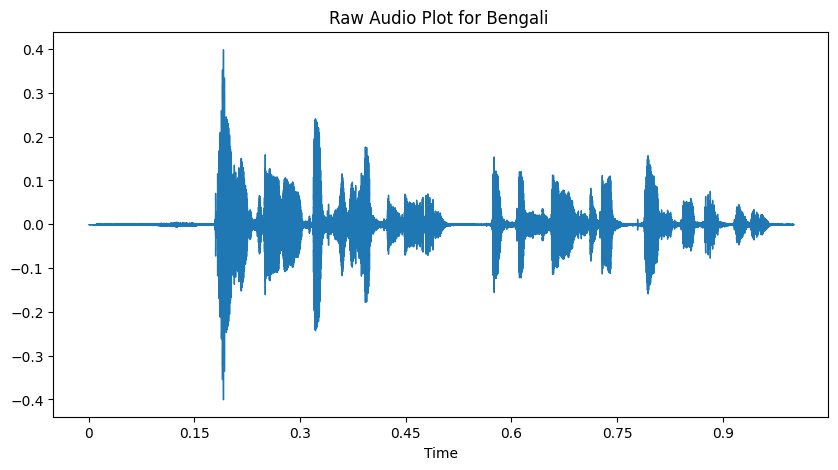

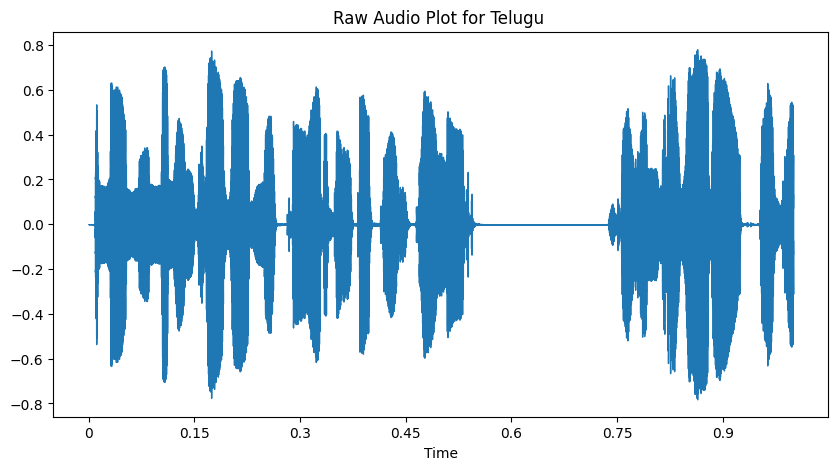

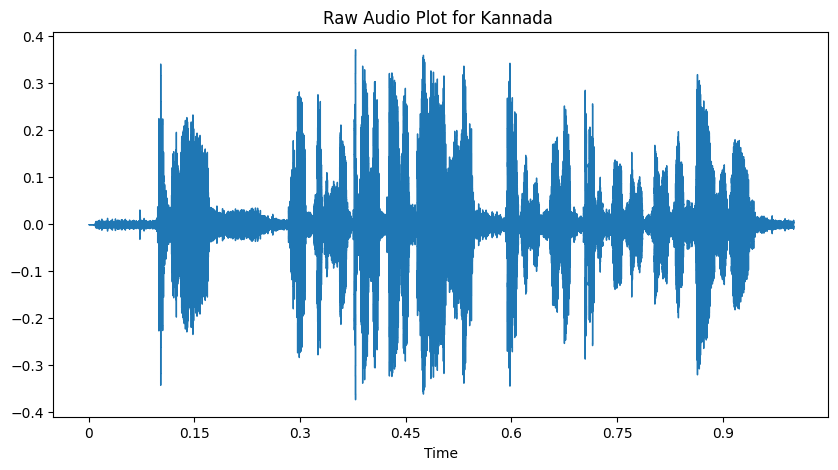

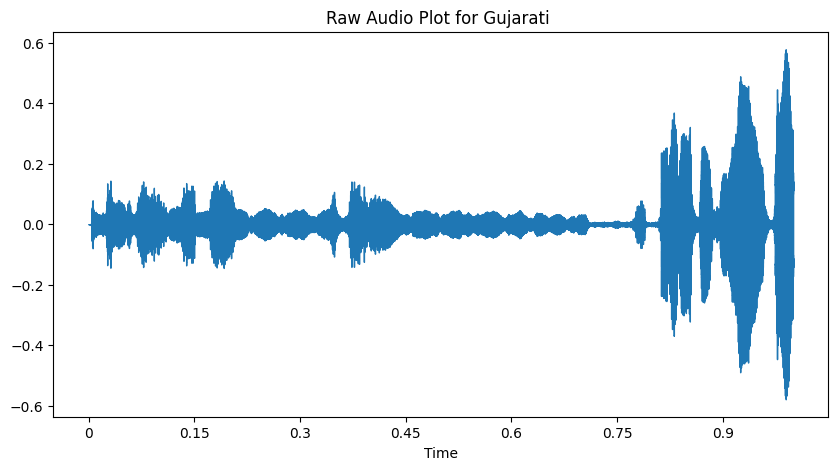

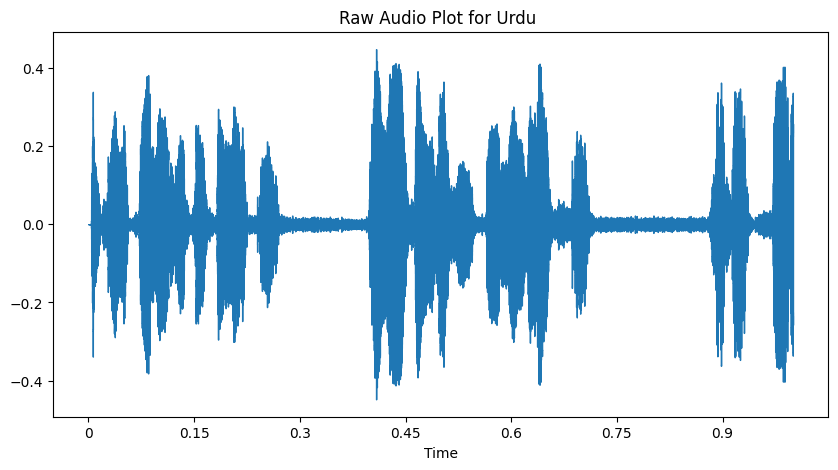

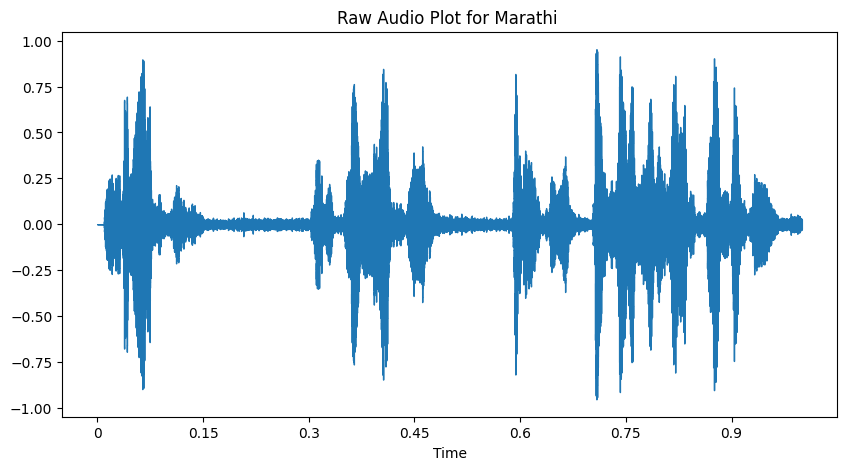

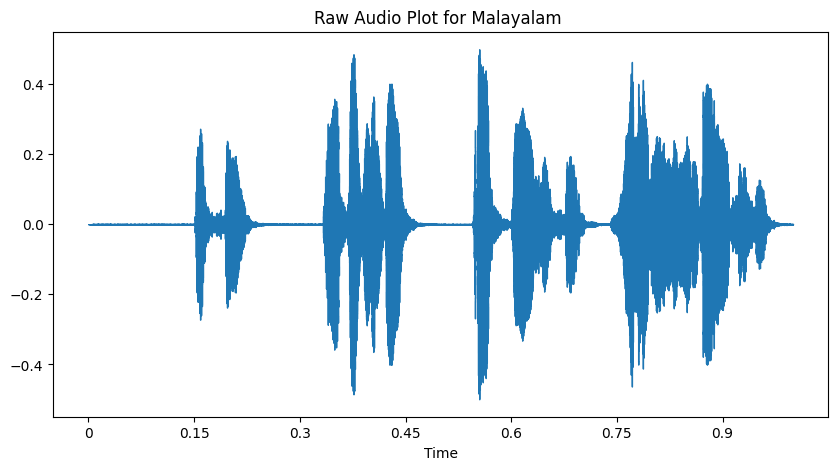

In [9]:


base_dir = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/'


languages = os.listdir(base_dir)

for language in languages:
    language_dir = os.path.join(base_dir, language)
    audio_files = glob(os.path.join(language_dir, '*.mp3'))
    random_audio_file = random.choice(audio_files)
    audio_data, _ = librosa.load(random_audio_file, sr=None)
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(audio_data, sr=len(audio_data))
    plt.title(f'Raw Audio Plot for {language} ')
    plt.show()


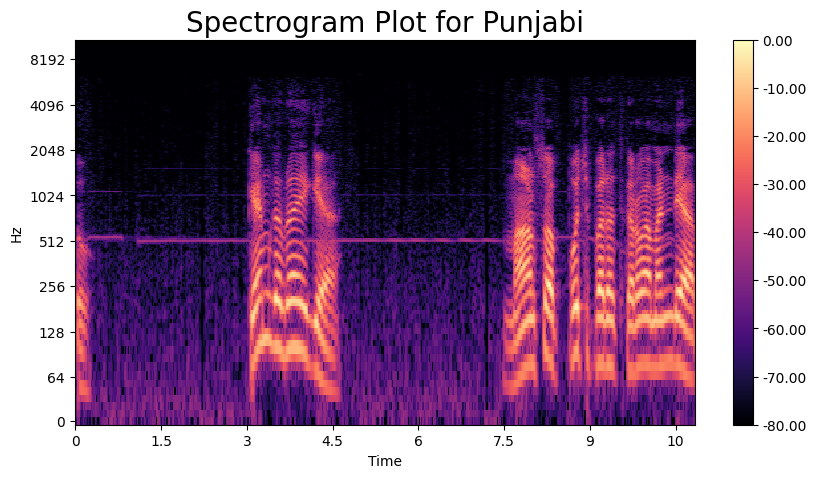

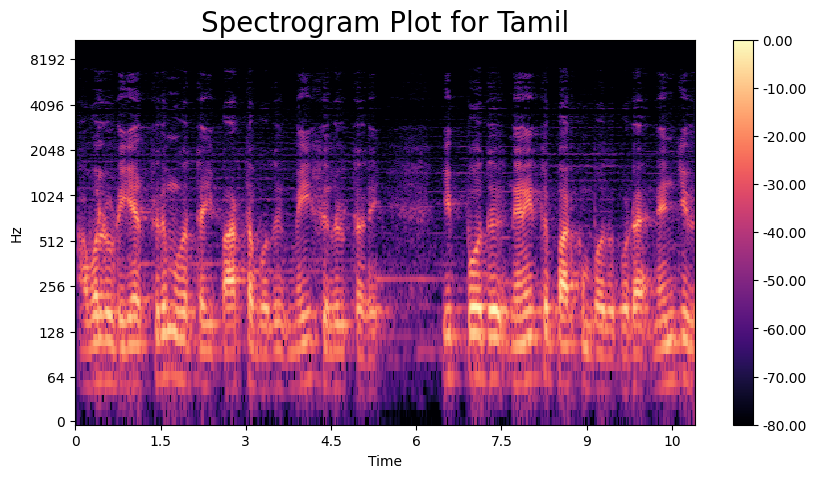

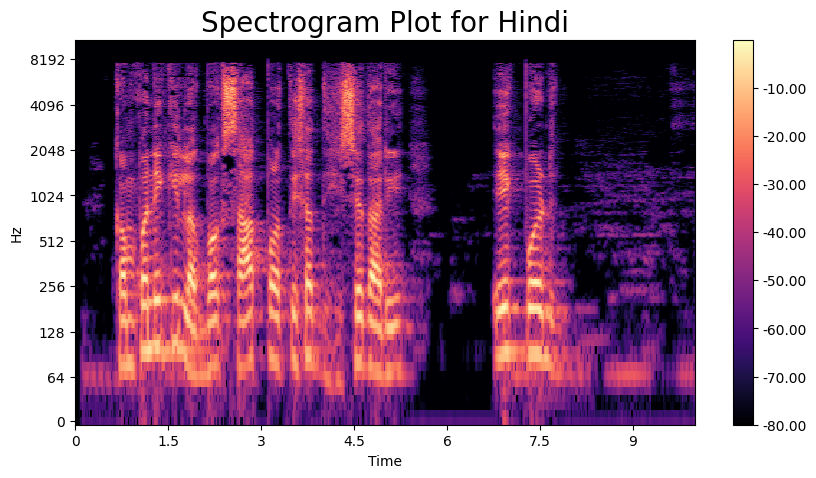

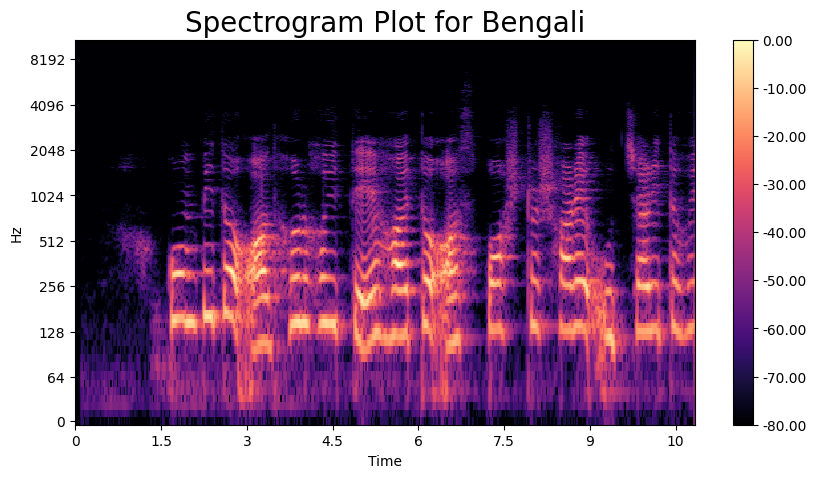

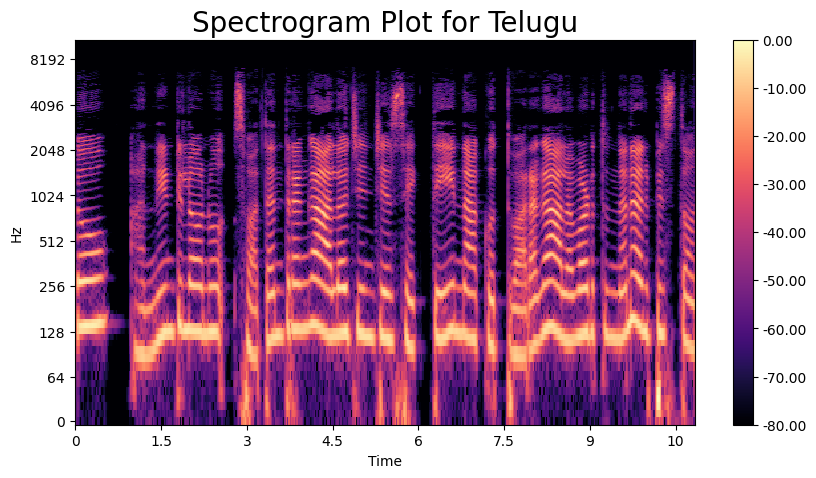

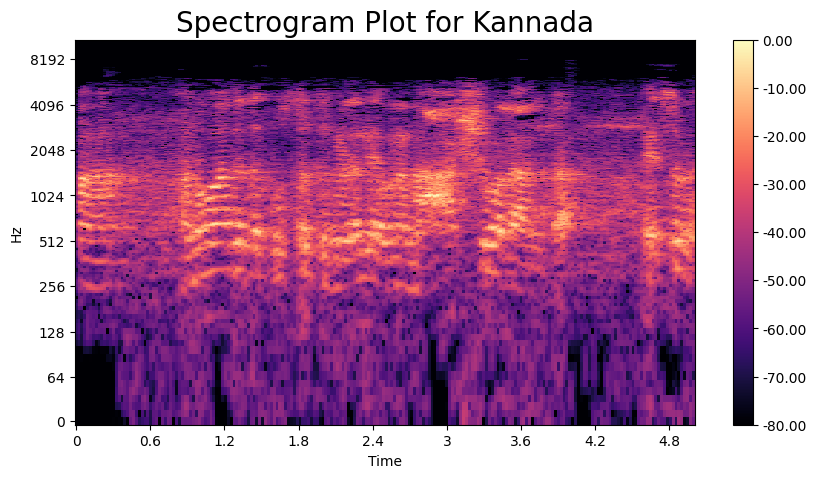

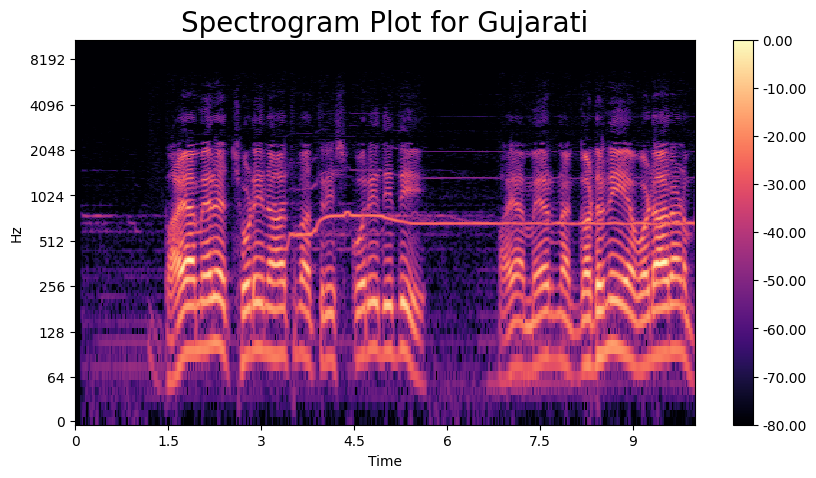

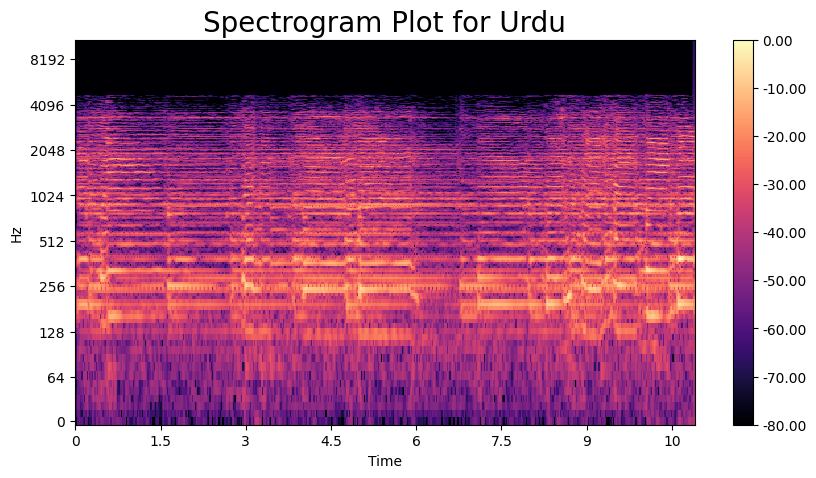

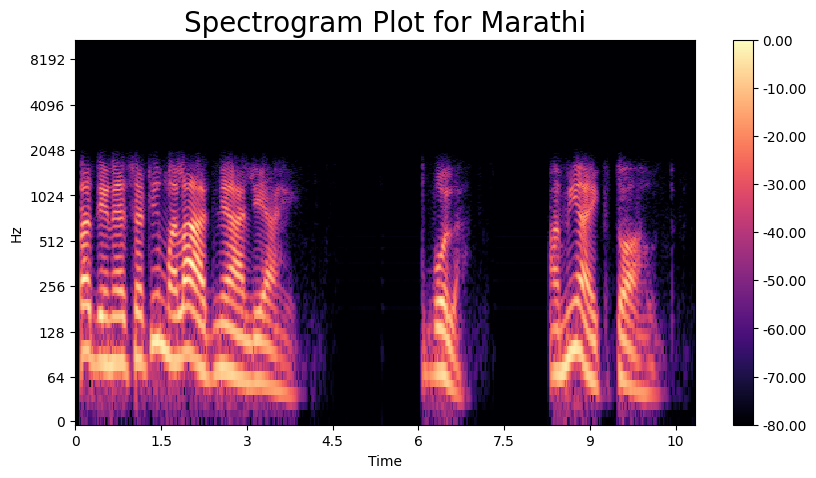

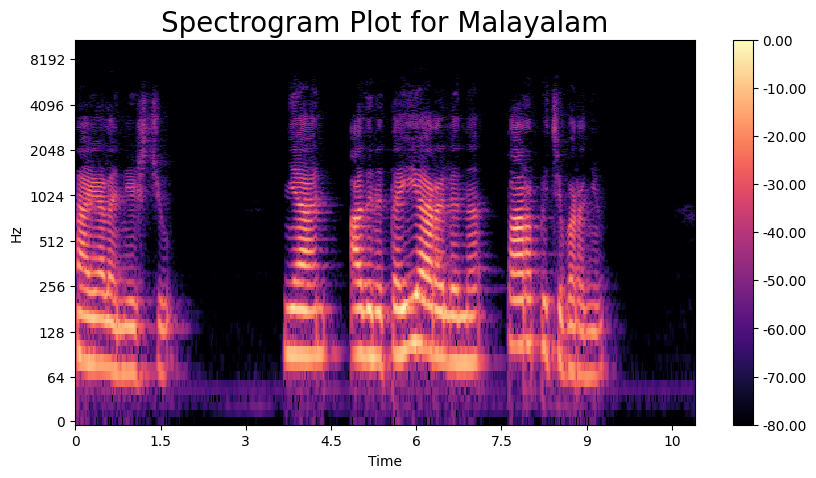

In [10]:
base_dir = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/'

languages = os.listdir(base_dir)

for language in languages:
    language_dir = os.path.join(base_dir, language)
    audio_files = glob(os.path.join(language_dir, '*.mp3'))
    random_audio_file = random.choice(audio_files)
    audio_data, _ = librosa.load(random_audio_file, sr=None)
    
    # Computing the spectrogram
    D = librosa.stft(audio_data)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    # Ploting the spectrogram
    fig, ax = plt.subplots(figsize=(10, 5))
    img = librosa.display.specshow(S_db,
                                  x_axis='time',
                                  y_axis='log',
                                  ax=ax)
    ax.set_title(f'Spectrogram Plot for {language}', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')
    plt.show()


# MFCC 
### MFCCs are a compact representation of the spectrum(When a waveform is represented by a summation of possibly infinite number of sinusoids) of an audio signal.



In [11]:
df1=MFCC_feature_extract(languages)

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=816
  warnings.warn(


Error processing /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/5339.mp3: frames must be specified for non-seekable files


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=361
  warnings.warn(


In [12]:
df1

MFCC_Features      Class
0      [-180.70287, 115.12236, -16.22719, -2.0688272,...      Tamil
1      [-189.71292, 100.28033, -36.683125, 26.916529,...      Tamil
2      [-269.7075, 134.60231, 6.177698, 18.319063, 30...      Tamil
3      [-209.90587, 108.14862, 9.920162, 37.573498, 0...      Tamil
4      [-228.4597, 129.19064, 6.0422463, -5.0125275, ...      Tamil
...                                                  ...        ...
44994  [-276.75012, 106.29325, -25.246868, 33.221035,...  Malayalam
44995  [-448.81546, 78.63365, 4.62497, 24.15059, 20.1...  Malayalam
44996  [-369.26584, 116.38963, 0.98752326, 2.4964833,...  Malayalam
44997  [-391.8933, 72.475136, 8.875582, 3.8066387, -1...  Malayalam
44998  [-352.8156, 65.20324, 5.1613774, 10.977466, 4....  Malayalam

[44999 rows x 2 columns]

In [13]:
lb=LabelEncoder()

df1['Class']=lb.fit_transform(df1.Class)


X=np.array(df1['MFCC_Features'].tolist())
y=np.array(df1['Class'].tolist())


X_train, X_test, y_train, y_test = train_test_split(X, df1['Class'], test_size=0.3, random_state=42)


num_classes = 9

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100,input_shape=(40, )))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#Second Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(9))
model.add(Activation('softmax'))
          
          
          
          
    
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test,y_test))


Epoch 1/25
985/985 [==============================] - 5s 4ms/step - loss: 4.7276 - accuracy: 0.1351 - val_loss: 1.9686 - val_accuracy: 0.2118
Epoch 2/25
985/985 [==============================] - 4s 4ms/step - loss: 1.9006 - accuracy: 0.2561 - val_loss: 1.6976 - val_accuracy: 0.3505
Epoch 3/25
985/985 [==============================] - 4s 4ms/step - loss: 1.6727 - accuracy: 0.3675 - val_loss: 1.3112 - val_accuracy: 0.6010
Epoch 4/25
985/985 [==============================] - 4s 4ms/step - loss: 1.2453 - accuracy: 0.5739 - val_loss: 0.8467 - val_accuracy: 0.7333
Epoch 5/25
985/985 [==============================] - 4s 4ms/step - loss: 0.9524 - accuracy: 0.6968 - val_loss: 0.5856 - val_accuracy: 0.8513
Epoch 6/25
985/985 [==============================] - 4s 4ms/step - loss: 0.7690 - accuracy: 0.7645 - val_loss: 0.4480 - val_accuracy: 0.8763
Epoch 7/25
985/985 [==============================] - 4s 4ms/step - loss: 0.6536 - accuracy: 0.8050 - val_loss: 0.3920 - val_accuracy: 0.8975
Epoch 

422/422 [==============================] - 1s 2ms/step


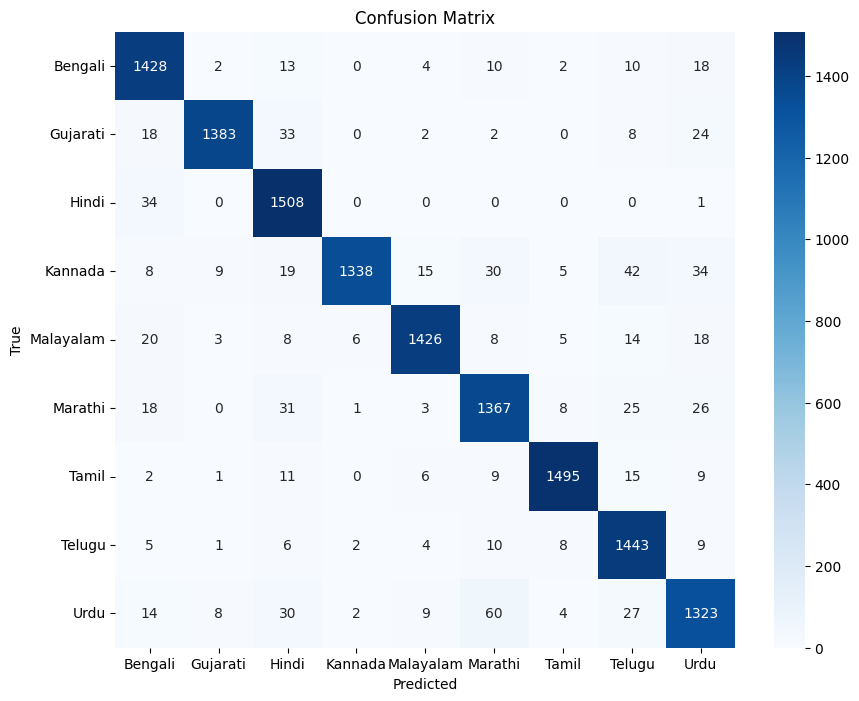

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Geting class labels based on our label encoder
class_labels = lb.classes_


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_test_labels = np.argmax(y_test, axis=1)


confusion_mtx = confusion_matrix(y_test_labels, y_pred_classes)


confusion_df = pd.DataFrame(confusion_mtx, index=class_labels, columns=class_labels)

# Creating a heatmap of confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

